## Problem Statement

## To Predict which language the given Input text is in.

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.simplefilter('ignore')

In [ ]:
#Loading the dataset
data = pd.read_csv('Language Detection.csv')

In [ ]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
#value count for each language
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
#separating the independent and dependent features
X = data['Text']
y = data['Language']

In [ ]:
#converting categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Text pre-processing

In [ ]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

## Bag of Words

In [ ]:
#creating bag of words using count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3),analyzer = 'char')
X = cv.fit_transform(data_list).toarray()

In [ ]:
X.shape

(10337, 59054)

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction 
y_pred = clf.predict(X_test)

**Evaluating the model**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy is :",ac)

Accuracy is : 0.9792069632495164


In [ ]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       114
           1       0.98      0.94      0.96        87
           2       0.94      0.95      0.94        99
           3       0.98      0.99      0.98       267
           4       0.98      0.98      0.98       213
           5       0.98      0.97      0.98       109
           6       1.00      1.00      1.00        65
           7       1.00      1.00      1.00         9
           8       0.95      0.97      0.96       145
           9       1.00      1.00      1.00        73
          10       1.00      1.00      1.00       121
          11       0.98      0.97      0.97       146
          12       1.00      0.99      1.00       127
          13       0.95      0.95      0.95       177
          14       0.97      1.00      0.98       126
          15       1.00      1.00      1.00        96
          16       1.00      0.98      0.99        94

    accuracy              

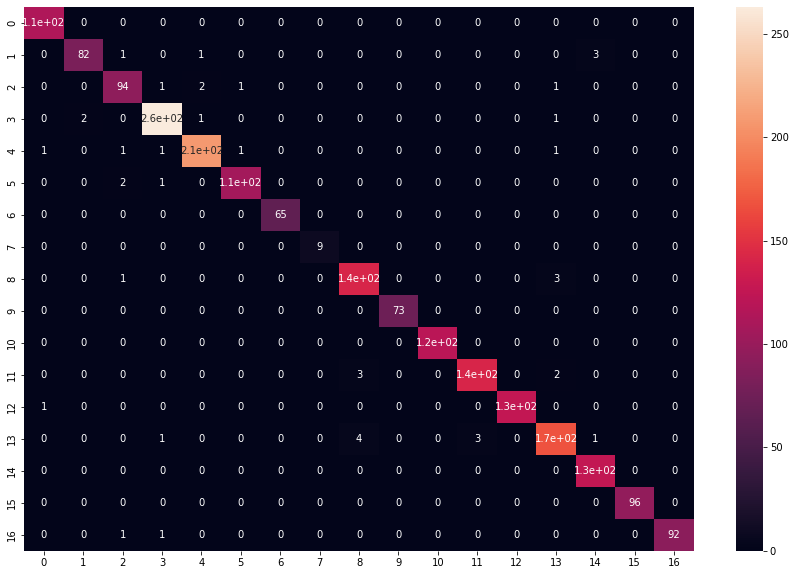

In [ ]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# prediction 
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy is :",ac)

Accuracy is : 0.9816247582205029


In [ ]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.99      0.89      0.93        87
           2       0.97      0.97      0.97        99
           3       0.97      0.99      0.98       267
           4       0.98      0.99      0.98       213
           5       1.00      0.97      0.99       109
           6       1.00      1.00      1.00        65
           7       1.00      1.00      1.00         9
           8       0.95      0.99      0.97       145
           9       1.00      1.00      1.00        73
          10       1.00      1.00      1.00       121
          11       1.00      0.98      0.99       146
          12       1.00      0.99      1.00       127
          13       0.99      0.97      0.98       177
          14       0.92      0.98      0.95       126
          15       1.00      1.00      1.00        96
          16       1.00      0.98      0.99        94

    accuracy              

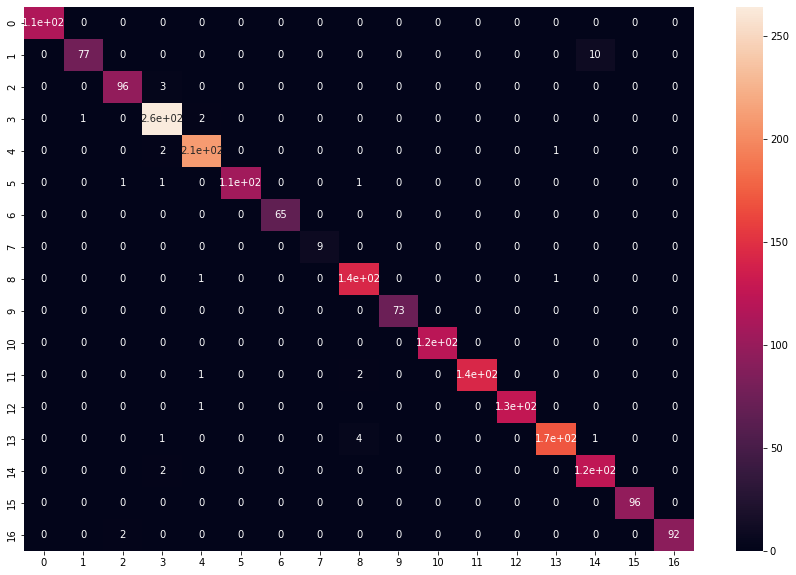

In [ ]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [25]:
def predict(text):
     X = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(X) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [26]:
predict('Sachin Ramesh Tendulkar BR (/ˌsʌtʃɪn tɛnˈduːlkər/ (listen); pronounced [sət͡ʃin t̪eːɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. Nicknamed "The Little Master"[4] and "Master Blaster"[5]')

The langauge is in English


In [27]:
predict('भेजना चाहते हैं हिंदी में मैसेज लेकिन नहीं आती टाइपिंग? इन आसान Tips से मोबाइल से भेजें हिंदी में टेक्स्ट मैसेज')

The langauge is in Hindi


In [28]:
predict('ಡೆವಲಪರ್‌ಗಳು ತಮ್ಮ ಆ್ಯಪ್ ನಿಮ್ಮ ಡೇಟಾವನ್ನು ಹೇಗೆ ಸಂಗ್ರಹಿಸುತ್ತದೆ ಮತ್ತು ಬಳಸುತ್ತದೆ ಎಂಬುದರ ಕುರಿತು ಮಾಹಿತಿಯನ್ನು ಇಲ್ಲಿ ತೋರಿಸಬಹುದು. ಡೇಟಾ ಸುರಕ್ಷತೆಯ ಕುರಿತು ಇನ್ನಷ್ಟು ತಿಳಿಯಿರಿ')

The langauge is in Kannada


In [33]:
predict('El Sahara (/səˈhɑːrə/, /səˈhærə/) es un desierto del continente africano. Con un área de 9 200 000 kilómetros cuadrados (3 600 000 millas cuadradas), es el desierto cálido más grande del mundo y el tercer desierto más grande en general, más pequeño que los desiertos de la Antártida y el norte del Ártico.[1][2][3 ]')

The langauge is in Spanish


In [34]:
predict('9،200،000 كيلومتر مربع (3،600،000 ميل مربع) ، وهي أكبر صحراء حارة في العالم وثالث أكبر صحراء بشكل عام ، وهي أصغر فقط من صحراء أنتاركتيكا وشمال القطب الشمالي.')

The langauge is in Arabic


In [35]:
predict('ആഫ്രിക്കൻ ഭൂഖണ്ഡത്തിലെ ഒരു മരുഭൂമിയാണ് സഹാറ (/səˈhɑːrə/, /səˈhærə/). 9,200,000 ചതുരശ്ര കിലോമീറ്റർ (3,600,000 ചതുരശ്ര മൈൽ) വിസ്തീർണ്ണമുള്ള ഇത് ലോകത്തിലെ ഏറ്റവും വലിയ ചൂടുള്ള മരുഭൂമിയും മൊത്തത്തിൽ മൂന്നാമത്തെ വലിയ മരുഭൂമിയുമാണ്, അന്റാർട്ടിക്കയിലെയും വടക്കൻ ആർട്ടിക്കിലെയും മരുഭൂമികളേക്കാൾ ചെറുതാണ്.[1][2][3 ]')

The langauge is in Malayalam
